<a href="https://colab.research.google.com/github/yussouf88/Deep_learning/blob/main/DL_file_upto_data1_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#Final
import torch
import torch.nn as nn
import torch.nn.functional as f
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('future.no_silent_downcasting', True)

import matplotlib.pyplot as plt


In [33]:
class Model(nn.Module):
  def __init__(self,ip = 4,h1 =108,h2=9,h3=10,op=3):
    super().__init__()
    self.fc1 = nn.Linear(ip,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc3 = nn.Linear(h2,h3)
    self.fc4 = nn.Linear(h3,op)

  def forword(self,x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = f.relu(self.fc3(x))
    x = self.fc4(x)

    return x

torch.manual_seed(10)
model = Model()



In [34]:
#Data Import
ur1 = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(ur1)
df['variety'] = df.species.replace(['setosa', 'versicolor', 'virginica'],[0,1,2])
x = df[['sepal_length',	'sepal_width',	'petal_length',	'petal_width']]
y = df['variety']
x = x.values
y = y.values
y = pd.to_numeric(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=10)
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [35]:
critereon = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=.01)
epoch = 100
lss = []

for i in range(epoch):
  y_pred = model.forword(x_train)
  loss = critereon(y_pred,y_train)
  lss.append(loss.detach().numpy())
  if i%10==0:
    print(f'for i = {i} loss = {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


for i = 0 loss = 1.1066840887069702
for i = 10 loss = 0.9150375723838806
for i = 20 loss = 0.5176275968551636
for i = 30 loss = 0.22841860353946686
for i = 40 loss = 0.10129230469465256
for i = 50 loss = 0.07080741971731186
for i = 60 loss = 0.06356342136859894
for i = 70 loss = 0.061172764748334885
for i = 80 loss = 0.06376346945762634
for i = 90 loss = 0.05846049264073372


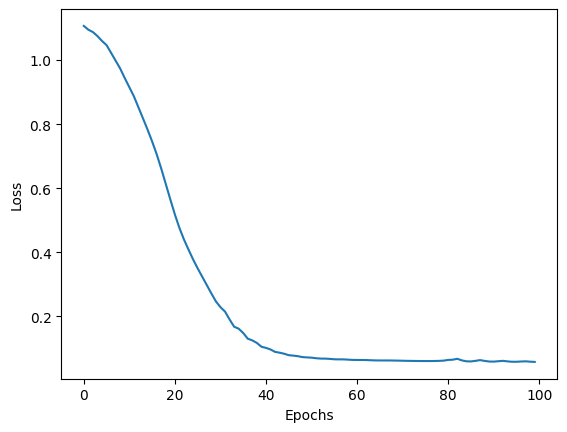

In [36]:
plt.plot(range(epoch),lss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [37]:
with torch.no_grad():
  y_eval = model.forword(x_test)
  loss = critereon(y_eval,y_test)
loss

tensor(0.0439)

In [38]:
corr = 0
with torch.no_grad():
  for i,dat in enumerate(x_test):
    y_eval = model.forword(dat)
    print(f'i = {i+1} y_eval = {y_eval.argmax()} \t {y_test[i]} \t = {y_eval.argmax()-y_test[i]}')

i = 1 y_eval = 1 	 1 	 = 0
i = 2 y_eval = 2 	 2 	 = 0
i = 3 y_eval = 0 	 0 	 = 0
i = 4 y_eval = 1 	 1 	 = 0
i = 5 y_eval = 0 	 0 	 = 0
i = 6 y_eval = 1 	 1 	 = 0
i = 7 y_eval = 2 	 1 	 = 1
i = 8 y_eval = 1 	 1 	 = 0
i = 9 y_eval = 0 	 0 	 = 0
i = 10 y_eval = 1 	 1 	 = 0
i = 11 y_eval = 1 	 1 	 = 0
i = 12 y_eval = 2 	 2 	 = 0
i = 13 y_eval = 1 	 1 	 = 0
i = 14 y_eval = 0 	 0 	 = 0
i = 15 y_eval = 0 	 0 	 = 0
i = 16 y_eval = 2 	 2 	 = 0
i = 17 y_eval = 1 	 1 	 = 0
i = 18 y_eval = 0 	 0 	 = 0
i = 19 y_eval = 0 	 0 	 = 0
i = 20 y_eval = 0 	 0 	 = 0
i = 21 y_eval = 2 	 2 	 = 0
i = 22 y_eval = 2 	 2 	 = 0
i = 23 y_eval = 2 	 2 	 = 0
i = 24 y_eval = 0 	 0 	 = 0
i = 25 y_eval = 1 	 1 	 = 0
i = 26 y_eval = 0 	 0 	 = 0
i = 27 y_eval = 1 	 1 	 = 0
i = 28 y_eval = 1 	 1 	 = 0
i = 29 y_eval = 1 	 1 	 = 0
i = 30 y_eval = 2 	 2 	 = 0
